In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("data.csv")


In [3]:
print(data.head())

   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no  


In [4]:
#missing values
data.previous.min()

0

In [5]:
data.rename(columns={'y':'deposit'}, inplace=True)
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


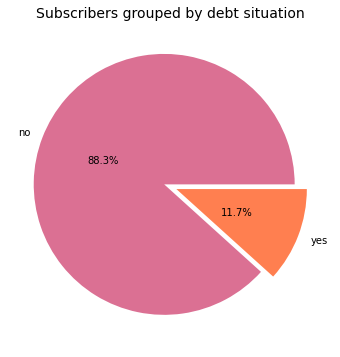

In [6]:
dataforimb = data.groupby("deposit")['age'].count()
pie, ax = plt.subplots(figsize=[10,6])
labels = dataforimb.keys()
colors = ['palevioletred', 'coral']
plt.pie(x=dataforimb, autopct="%.1f%%", explode=[0.05]*2, labels=labels, pctdistance=0.5, colors = colors)
plt.title("Subscribers grouped by debt situation", fontsize=14);



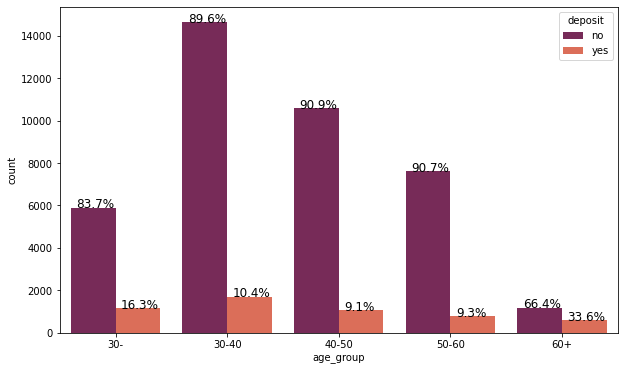

In [9]:
def f(row):
    if row["age"] <= 30:
        value = '30-'
    if (row["age"] > 30) & (row["age"] < 40):
        value = '30-40'
    if (row["age"] >= 40) & (row["age"] < 50):
        value = '40-50'
    if (row["age"] >= 50) & (row["age"] < 60):
        value = '50-60'
    if (row["age"] >= 60):
        value = '60+'
    return value

dataage = data
dataage['age_group'] = dataage.apply(f, axis=1)
#print(dataage)

def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    total1 = feature.value_counts()
    total1 = total1.reindex(["30-", "30-40", "40-50", "50-60", "60+"])
    for i in range(Number_of_categories):
        total = total1[i]

        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()
pie, ax = plt.subplots(figsize=[10,6])
ax = sns.countplot( x="age_group", hue = "deposit", data = dataage,palette = "rocket", order = ["30-", "30-40", "40-50", "50-60", "60+"] )
with_hue(ax, dataage['age_group'], 5, 2 )

[Text(0, 0, 'management'),
 Text(0, 0, 'technician'),
 Text(0, 0, 'entrepreneur'),
 Text(0, 0, 'blue-collar'),
 Text(0, 0, 'unknown'),
 Text(0, 0, 'retired'),
 Text(0, 0, 'admin.'),
 Text(0, 0, 'services'),
 Text(0, 0, 'self-employed'),
 Text(0, 0, 'unemployed'),
 Text(0, 0, 'housemaid'),
 Text(0, 0, 'student')]

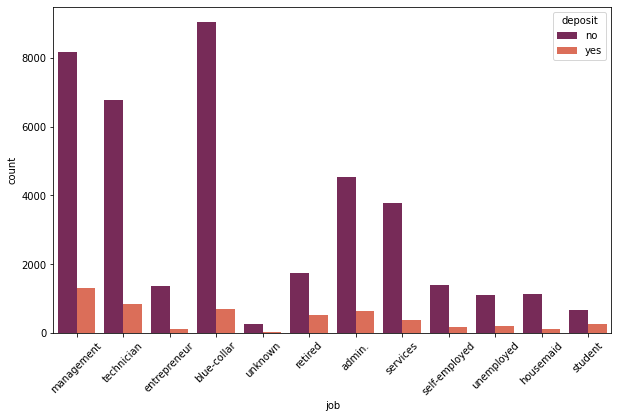

In [10]:
#JOB
pie, ax = plt.subplots(figsize=[10,6])
ax = sns.countplot( x="job", hue = "deposit", data = data, palette = "rocket")
ax.set_xticklabels(labels = ax.get_xticklabels(), rotation=45)


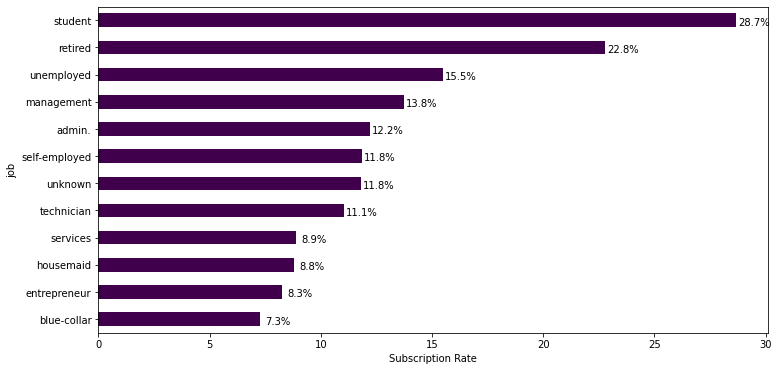

In [11]:
#Subscription Rate by Job
count_job_response_pct = pd.crosstab(data['deposit'],data['job']).apply(lambda x: x/x.sum() * 100)
count_job_response_pct = count_job_response_pct.transpose()
plot_job = count_job_response_pct['yes'].sort_values(ascending = True).plot(kind ='barh',
                                                                           figsize = (12,6), cmap="PRGn")
                                                                               
plt.xlabel('Subscription Rate')
plt.ylabel('job')
for rec, label in zip(plot_job.patches,
                      count_job_response_pct['yes'].sort_values(ascending = True).round(1).astype(str)):
    plot_job.text(rec.get_width()+0.8, 
                  rec.get_y()+ rec.get_height()-0.5, 
                  label+'%', 
                  ha = 'center', 
                  va='bottom')

[Text(0, 0, 'married'), Text(0, 0, 'single'), Text(0, 0, 'divorced')]

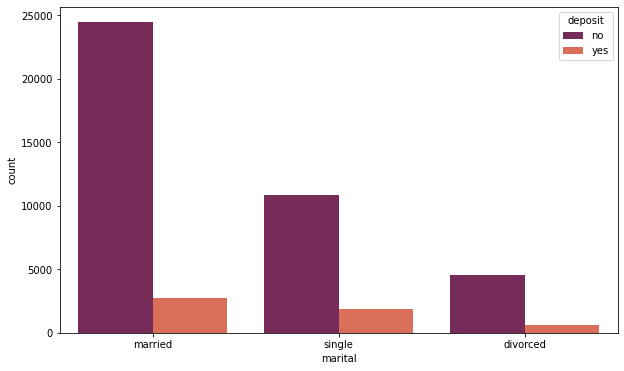

In [12]:
#MARITAL
pie, ax = plt.subplots(figsize=[10,6])
ax = sns.countplot( x="marital", hue = "deposit", data = data,  palette = "rocket")
ax.set_xticklabels(labels = ax.get_xticklabels())


[Text(0, 0, 'tertiary'),
 Text(0, 0, 'secondary'),
 Text(0, 0, 'unknown'),
 Text(0, 0, 'primary')]

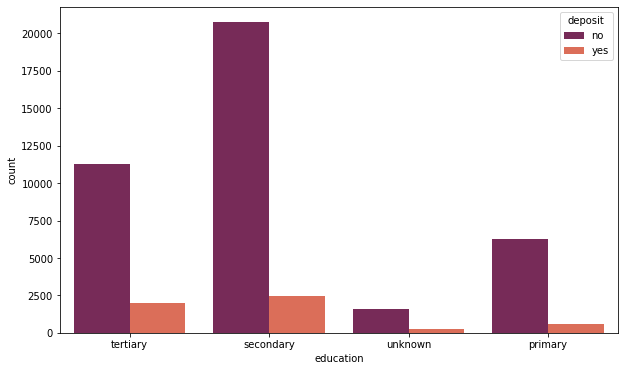

In [13]:
#EDUCATION 
pie, ax = plt.subplots(figsize=[10,6])
ax = sns.countplot( x="education", hue = "deposit", data = data,  palette = "rocket")
ax.set_xticklabels(labels = ax.get_xticklabels())

[Text(0, 0, 'tertiary'),
 Text(0, 0, 'secondary'),
 Text(0, 0, 'unknown'),
 Text(0, 0, 'primary')]

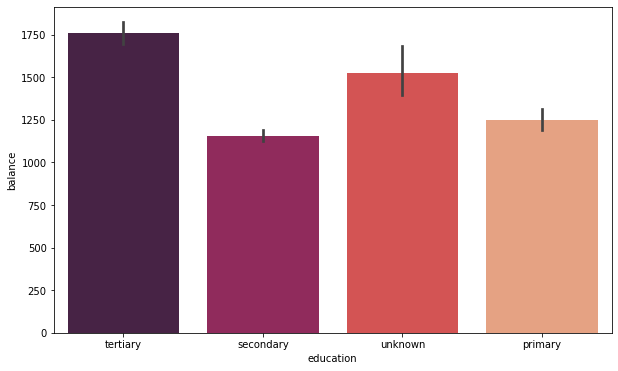

In [14]:
#balance education 
pie, ax = plt.subplots(figsize=[10,6])
ax = sns.barplot( x="education", y = "balance", data = data,  palette = "rocket")
ax.set_xticklabels(labels = ax.get_xticklabels())




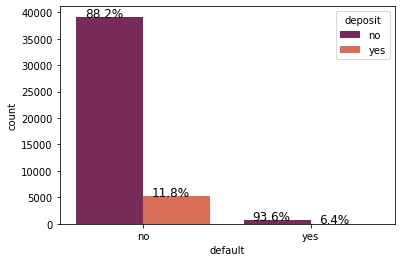

[Text(0, 0, 'no'), Text(1, 0, 'yes')]

In [15]:
#DEFAULT 



def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    total1 = feature.value_counts()
    total1 = total1.reindex(["no", "yes"])
    for i in range(Number_of_categories):
        total = total1[i]

        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()



ax = sns.countplot( x="default", hue = "deposit", data = data, palette = "rocket")
with_hue(ax, data['default'], 2, 2 )
ax.set_xticklabels(labels = ax.get_xticklabels())

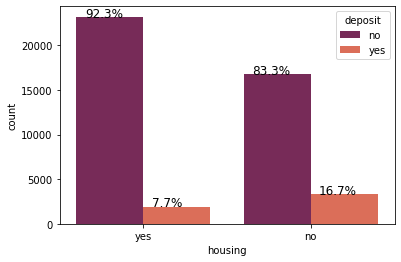

[Text(0, 0, 'yes'), Text(1, 0, 'no')]

In [16]:
#HOUSING 



def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    total1 = feature.value_counts()
    total1 = total1.reindex(["yes", "no"])
    for i in range(Number_of_categories):
        total = total1[i]

        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()
    
    
ax = sns.countplot( x="housing", hue = "deposit", data = data,  palette = "rocket", order = ["yes", "no"])
with_hue(ax, data['housing'], 2, 2 )

ax.set_xticklabels(labels = ax.get_xticklabels())

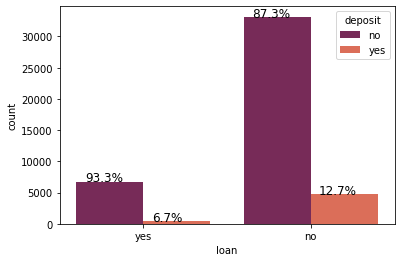

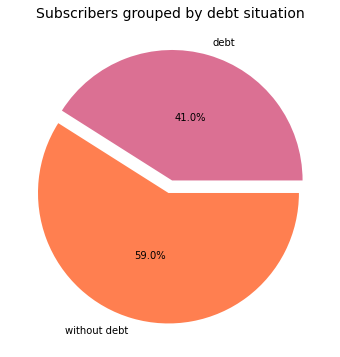

In [17]:
#LOAN

import warnings
warnings.simplefilter("ignore")




def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    total1 = feature.value_counts()
    total1 = total1.reindex(["yes", "no"])
    for i in range(Number_of_categories):
        total = total1[i]

        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()
    


ax = sns.countplot( x="loan", hue = "deposit", data = data, palette = "rocket", order = ["yes", "no"])
with_hue(ax, data['loan'], 2, 2 )
ax.set_xticklabels(labels = ax.get_xticklabels())





subscr = []
#VAZHNO 90% subscribers are without loan.
subscr = data[data['deposit'] == 'yes']
def f(row):
    if (row['loan'] == 'yes') or  (row['housing'] == 'yes') or (row['default'] == 'yes'):
        value = 'debt'
    else:
        value = 'without debt'
    return value

subscr['debtsituation'] = subscr.apply(f, axis=1)

dataforpie = subscr.groupby("debtsituation")['age'].count()
pie, ax = plt.subplots(figsize=[10,6])
labels = dataforpie.keys()
colors = ['palevioletred', 'coral']
plt.pie(x=dataforpie, autopct="%.1f%%", explode=[0.05]*2, labels=labels, pctdistance=0.5, colors = colors)
plt.title("Subscribers grouped by debt situation", fontsize=14);





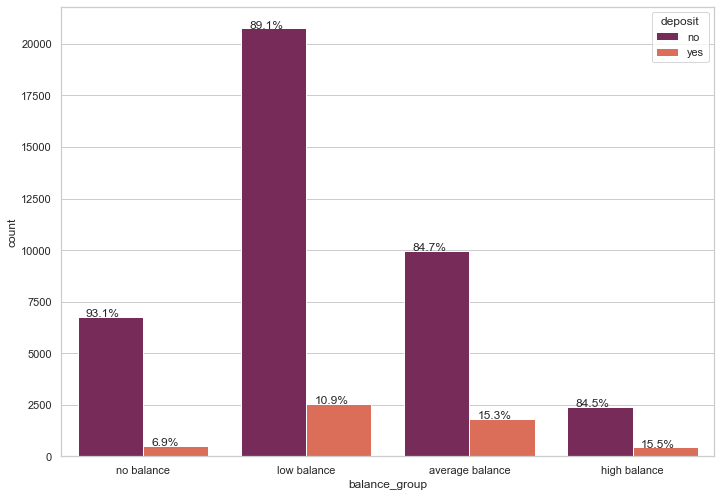

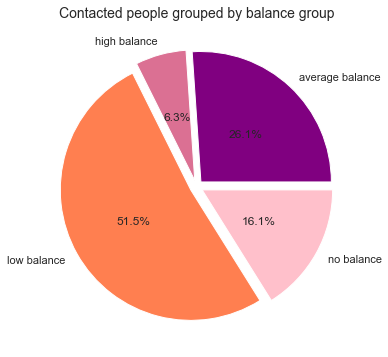

In [786]:
#BALANCE
def f(row):
    if row["balance"] <= 0:
        value = 'no balance'
    if (row["balance"] > 0) & (row["balance"] <= 1000):
        value = 'low balance'
    if (row["balance"] > 1000) & (row["balance"] <= 5000):
        value = 'average balance'
    if (row["balance"] > 5000):
        value = 'high balance'
    return value
databal = data
databal['balance_group'] = databal.apply(f, axis=1)
#print(data)


def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    total1 = feature.value_counts()
    total1 = total1.reindex(['no balance', 'low balance',
 'average balance', 'high balance'])
    for i in range(Number_of_categories):
        total = total1[i]

        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

    
ax = sns.countplot( x="balance_group", hue = "deposit", data = databal, palette = "rocket", order = ['no balance', 'low balance',
 'average balance', 'high balance'])     
with_hue(ax, databal['balance_group'], 4, 2)


dataforpie = databal.groupby("balance_group")['age'].count()
pie, ax = plt.subplots(figsize=[10,6])
labels = dataforpie.keys()
colors = ['purple', 'palevioletred', 'coral', 'pink']
plt.pie(x=dataforpie, autopct="%.1f%%", explode=[0.05]*4, labels=labels, pctdistance=0.5, colors = colors)
plt.title("Contacted people grouped by balance group", fontsize=14);



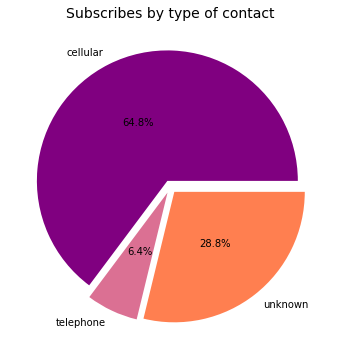

In [18]:
#CONTACT
# subscribers who are contacted by various modes.
dataforpie = data.groupby("contact")['age'].count()
pie, ax = plt.subplots(figsize=[10,6])
labels = dataforpie.keys()
colors = ['purple', 'palevioletred', 'coral']
plt.pie(x=dataforpie, autopct="%.1f%%", explode=[0.05]*3, labels=labels, pctdistance=0.5, colors = colors)
plt.title("Subscribes by type of contact", fontsize=14);


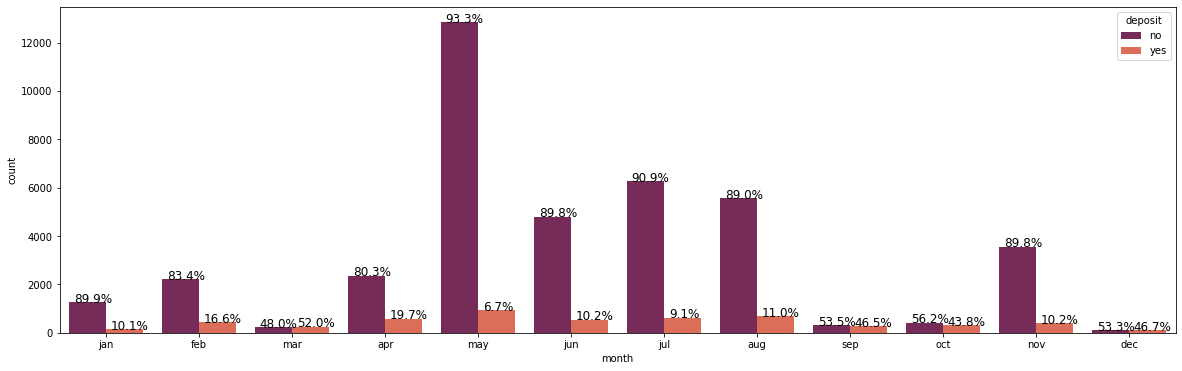

[Text(0, 0, 'jan'),
 Text(1, 0, 'feb'),
 Text(2, 0, 'mar'),
 Text(3, 0, 'apr'),
 Text(4, 0, 'may'),
 Text(5, 0, 'jun'),
 Text(6, 0, 'jul'),
 Text(7, 0, 'aug'),
 Text(8, 0, 'sep'),
 Text(9, 0, 'oct'),
 Text(10, 0, 'nov'),
 Text(11, 0, 'dec')]

In [19]:
#MONTH 


def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    total1 = feature.value_counts()
    total1 = total1.reindex(['jan', 'feb','mar', 'apr','may', 'jun', 'jul', 'aug','sep','oct', 'nov', 'dec'])
    for i in range(Number_of_categories):
        total = total1[i]

        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()
    

plt.figure(figsize=(20, 6))
ax = sns.countplot( x="month", hue = "deposit", data = data, palette = "rocket", order = ['jan', 'feb','mar', 'apr','may', 'jun', 'jul', 'aug','sep','oct', 'nov', 'dec'])
with_hue(ax, data['month'], 12, 2 )
ax.set_xticklabels(labels = ax.get_xticklabels())






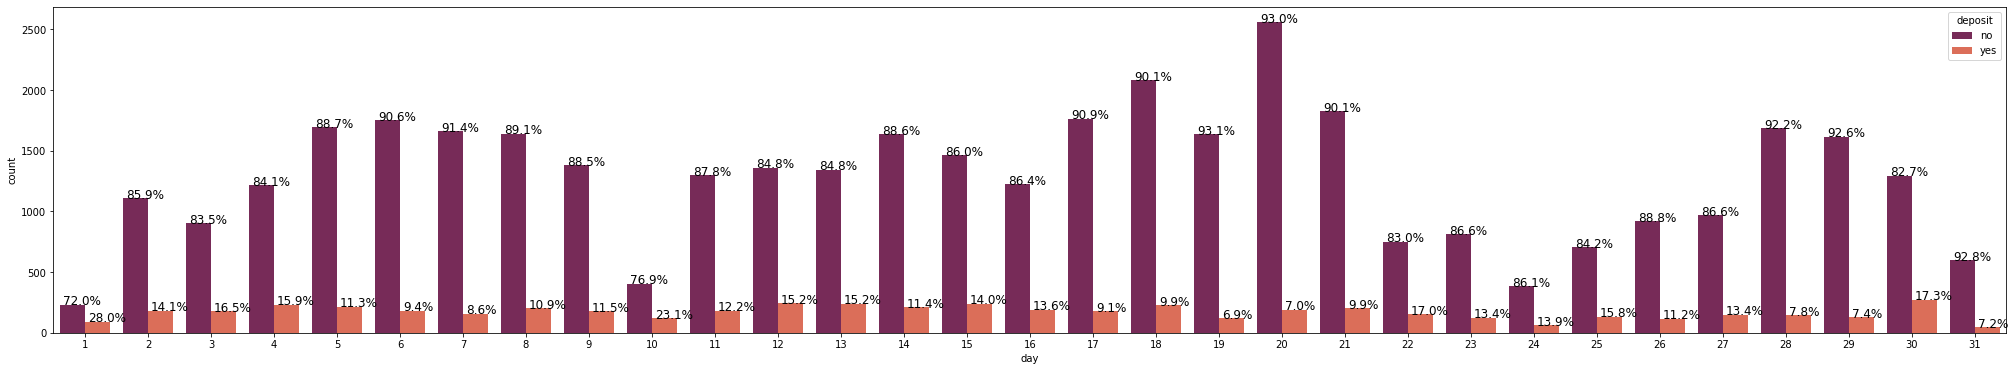

[Text(0, 0, '1'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(6, 0, '7'),
 Text(7, 0, '8'),
 Text(8, 0, '9'),
 Text(9, 0, '10'),
 Text(10, 0, '11'),
 Text(11, 0, '12'),
 Text(12, 0, '13'),
 Text(13, 0, '14'),
 Text(14, 0, '15'),
 Text(15, 0, '16'),
 Text(16, 0, '17'),
 Text(17, 0, '18'),
 Text(18, 0, '19'),
 Text(19, 0, '20'),
 Text(20, 0, '21'),
 Text(21, 0, '22'),
 Text(22, 0, '23'),
 Text(23, 0, '24'),
 Text(24, 0, '25'),
 Text(25, 0, '26'),
 Text(26, 0, '27'),
 Text(27, 0, '28'),
 Text(28, 0, '29'),
 Text(29, 0, '30'),
 Text(30, 0, '31')]

In [20]:
#DAY

def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    total1 = feature.value_counts()
    total1 = list(total1.sort_index())
    for i in range(Number_of_categories):
        total = total1[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()
    

plt.figure(figsize=(35, 6))
ax = sns.countplot( x="day", hue = "deposit", data = data, palette = "rocket")
with_hue(ax, data['day'], 31, 2 )
ax.set_xticklabels(labels = ax.get_xticklabels())




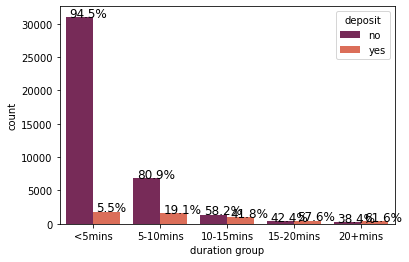

In [21]:
def f(row):
    if row["duration"] < 300:
        value = '<5mins'
    if (row["duration"] >= 300) & (row["duration"] < 600):
        value = '5-10mins'
    if (row["duration"] >= 600) & (row["duration"] < 900):
        value = '10-15mins'
    if (row["duration"] >= 900) & (row["duration"] < 1200):
        value = '15-20mins'
    if (row["duration"] >= 1200):
        value = '20+mins'
    return value
datadur = data[data['duration'] != 0]

datadur['duration group'] = datadur.apply(f, axis=1)


def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    total1 = feature.value_counts()
    total1 = total1.reindex(['<5mins', '5-10mins', '10-15mins', '15-20mins', '20+mins'])
    for i in range(Number_of_categories):
        total = total1[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()

ax = sns.countplot( x="duration group", hue = "deposit", data = datadur, palette = "rocket", order = ['<5mins', '5-10mins', '10-15mins', '15-20mins', '20+mins'])     
with_hue(ax, datadur['duration group'], 5, 2)

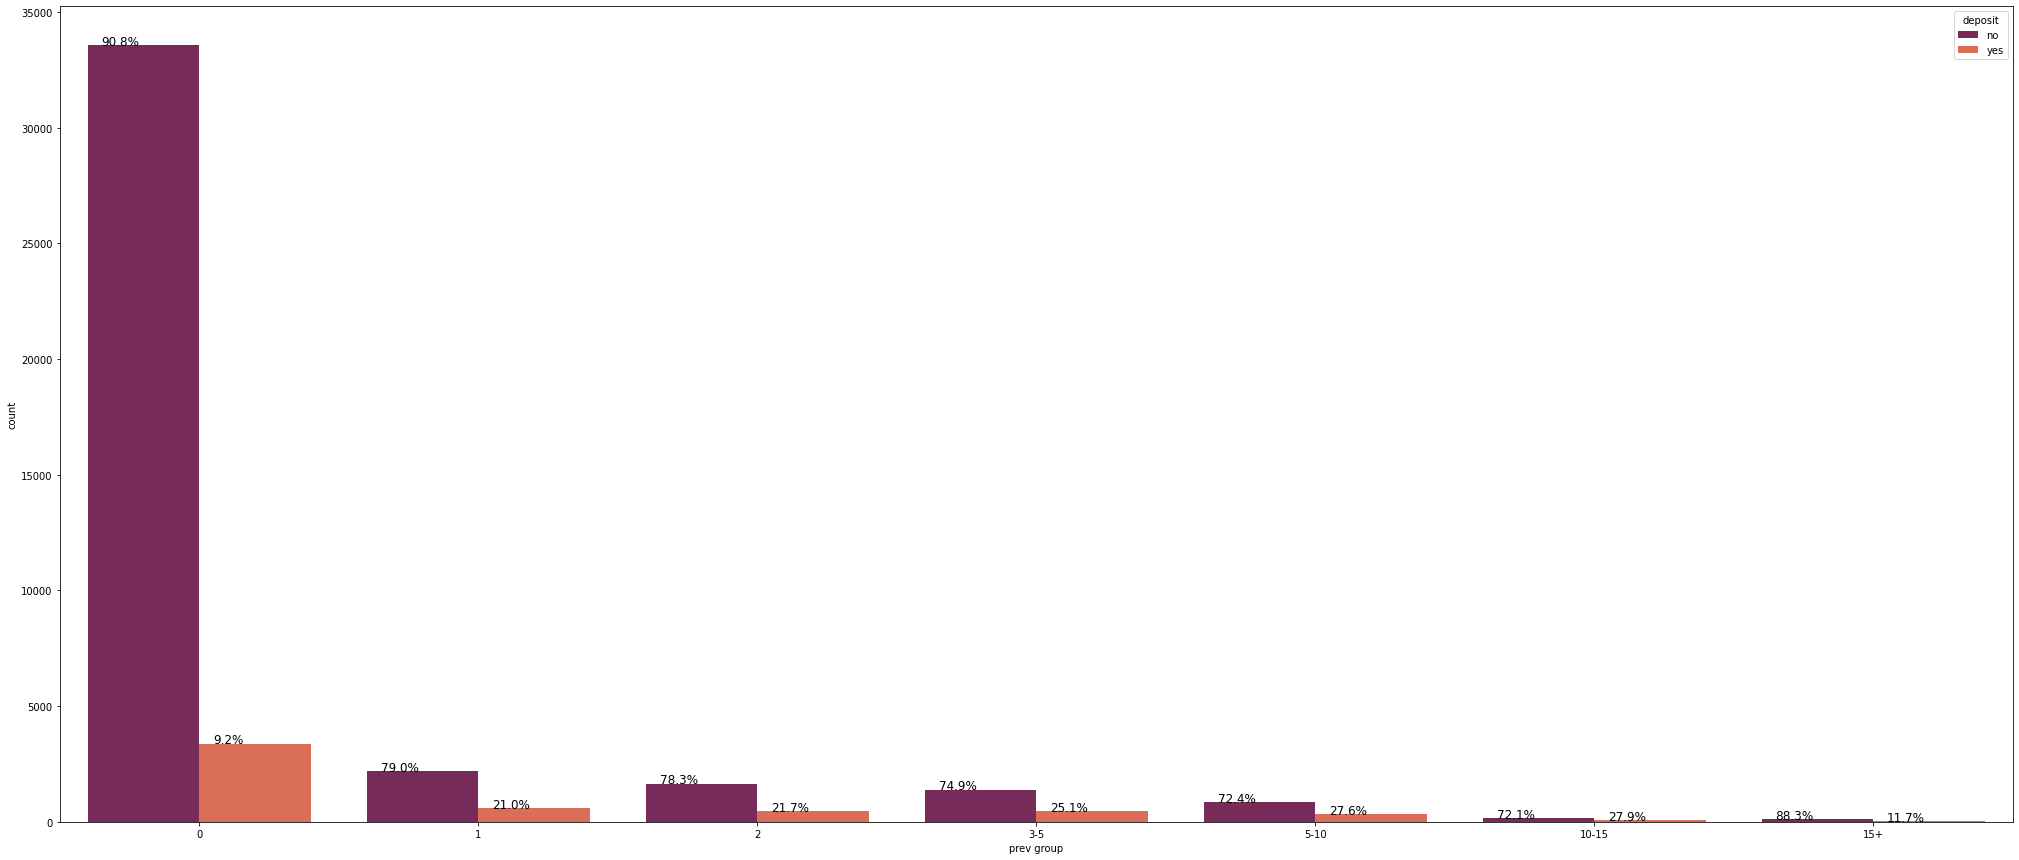

In [23]:
#PDAYS
def f(row):
    if row["previous"] == 0:
        value = '0'
    if row["previous"] == 1:
        value = '1'
    if row["previous"] == 2:
        value = '2'
    if (row["previous"] > 2) & (row["previous"] < 5):
        value = '3-5'
    if (row["previous"] >= 5) & (row["previous"] < 10):
        value = '5-10'
    if (row["previous"] >= 10) & (row["previous"] < 15):
        value = '10-15'
#    if (row["previous"] >= 15) & (row["previous"] < 20):
#        value = '15-20'
    if (row["previous"] >= 15):
        value = '15+'
    return value

dataprev = data

dataprev['prev group'] = dataprev.apply(f, axis=1)


def with_hue(plot, feature, Number_of_categories, hue_categories):
    a = [p.get_height() for p in plot.patches]
    patch = [p for p in plot.patches]
    total1 = feature.value_counts()
    total1 = total1.reindex(['0','1','2', '3-5', '5-10', '10-15', '15+'])
    for i in range(Number_of_categories):
        total = total1[i]
        for j in range(hue_categories):
            percentage = '{:.1f}%'.format(100 * a[(j*Number_of_categories + i)]/total)
            x = patch[(j*Number_of_categories + i)].get_x() + patch[(j*Number_of_categories + i)].get_width() / 2 - 0.15
            y = patch[(j*Number_of_categories + i)].get_y() + patch[(j*Number_of_categories + i)].get_height() 
            ax.annotate(percentage, (x, y), size = 12)
    plt.show()


plt.figure(figsize=(35, 15))   

ax = sns.countplot( x="prev group", hue = "deposit", data = dataprev, palette = "rocket", order = ['0', '1', '2', '3-5', '5-10',  '10-15', '15+'])     
with_hue(ax, dataprev['prev group'], 7, 2)

[Text(0, 0, 'unknown'),
 Text(0, 0, 'failure'),
 Text(0, 0, 'other'),
 Text(0, 0, 'success')]

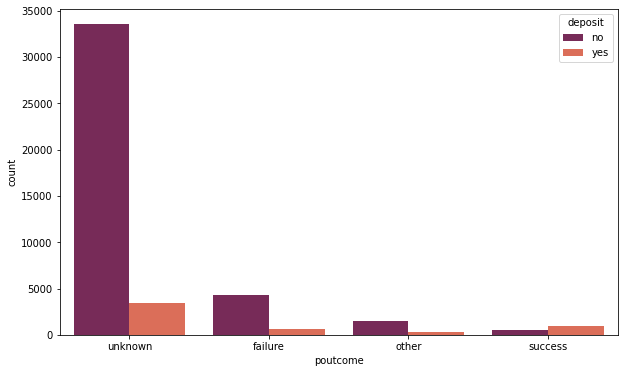

In [24]:
#POUTCOME
plt.figure(figsize=(10, 6))   

ax = sns.countplot( x="poutcome", hue = "deposit", data = data, palette = "rocket")
ax.set_xticklabels(labels = ax.get_xticklabels())


In [ ]:
dataset = data
dataset = dataset.drop(columns = ['age_group',  'prev group'],  axis = 1)


In [49]:
#education is an ordinal attribute => OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
enc.fit(dataset[["education"]])
dataset["education"] = enc.transform(dataset[["education"]])


In [48]:
#numeric attributes => StandardScaler 
from sklearn import preprocessing
scaler = preprocessing.StandardScaler()
scaler.fit(dataset[["age","balance","duration","campaign","pdays","previous", "day"]])

dataset[["age","balance","duration","campaign","pdays","previous", "day"]] = scaler.transform(dataset[["age","balance","duration","campaign","pdays","previous", "day"]])
print(dataset[["age","balance","duration","campaign","pdays","previous", "day"]].mean(axis = 0))
print(dataset[["age","balance","duration","campaign","pdays","previous", "day"]].std(axis = 0))

age         4.275455e-16
balance     3.069975e-15
duration    3.368167e-17
campaign    1.259098e-14
pdays      -1.395817e-13
previous    1.355795e-13
day        -9.219436e-15
dtype: float64
age         1.000011
balance     1.000011
duration    1.000011
campaign    1.000011
pdays       1.000011
previous    1.000011
day         1.000011
dtype: float64


In [50]:
#categorical attributes => LabelEncoder 
arr = ["job","marital","default","housing","loan","contact","month","poutcome","deposit"]
for x in arr:
    le = preprocessing.LabelEncoder()
    le.fit(dataset[x])
    dataset[x] = le.transform(dataset[x])


In [51]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif



#dataset = dataset.drop(columns = ['pdays'], axis = 1)
#20% for testing dataset
array = dataset.values
#array = newdata
# Features: first 15 columns
X = array[:,0:-1]

# Target variable: 'response_binary'
Y = array[:,-1]
Y=Y.astype('int')
test_size= 0.3
features = list(dataset.columns)
X_train, X_test, Y_train, Y_test= train_test_split(X, Y, test_size=test_size)

In [52]:
#INFORMATION GAIN = MUTUAL INFORMATION 
def inf_gain(X, kol = 'all'):
    selector = SelectKBest(score_func=mutual_info_classif, k=kol)
    selector.fit(X, Y)
    cols = selector.get_support(indices=True)
        
    res = [x for _,x in sorted(zip(selector.scores_, features))]
    return selector.transform(X)
    

In [53]:
inf_gain(X)

array([[ 1.60696496,  4.        ,  1.        , ..., -0.41145311,
        -0.25194037,  3.        ],
       [ 0.28852927,  9.        ,  2.        , ..., -0.41145311,
        -0.25194037,  3.        ],
       [-0.74738448,  2.        ,  1.        , ..., -0.41145311,
        -0.25194037,  3.        ],
       ...,
       [ 2.92540065,  5.        ,  1.        , ...,  1.43618859,
         1.05047333,  2.        ],
       [ 1.51279098,  1.        ,  1.        , ..., -0.41145311,
        -0.25194037,  3.        ],
       [-0.37068857,  2.        ,  1.        , ...,  1.4761376 ,
         4.52357654,  1.        ]])

In [54]:
# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
def rf(X, kol = 'all'):

    arr = [x for x in range(16)]
    # define the model
    model = DecisionTreeClassifier()
    # fit the model
    model.fit(X, Y)
    # get importance
    importance = model.feature_importances_
    res = [x for _,x in sorted(zip(importance, features))]
    cols = [x for _,x in sorted(zip(importance, arr))]
    cols = cols[::-1]
    cols = cols[:kol]
    res = res[::-1]
    return X[:, cols]

rf(X, 5)

array([[ 0.0110161 ,  0.25641925,  8.        ,  1.60696496, -1.29847633],
       [-0.41612696, -0.43789469,  8.        ,  0.28852927, -1.29847633],
       [-0.70736086, -0.44676247,  8.        , -0.74738448, -1.29847633],
       ...,
       [ 3.37379688,  1.42959305,  9.        ,  2.92540065,  0.14341818],
       [ 0.97014641, -0.22802402,  9.        ,  1.51279098,  0.14341818],
       [ 0.39932797,  0.52836436,  9.        , -0.37068857,  0.14341818]])

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier

from sklearn import svm


In [56]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNNeuclidean', KNeighborsClassifier(metric = 'euclidean')))
models.append(('KNNmanhattan', KNeighborsClassifier(metric = 'manhattan')))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NBGaussian', GaussianNB()))
models.append(('RandomForest', RandomForestClassifier()))
#models.append(('SVMrbf', svm.SVC(kernel='rbf')))
#models.append(('SVMlinear', svm.SVC(kernel='linear')))
#models.append(('SVMpoly', svm.SVC(kernel='poly')))



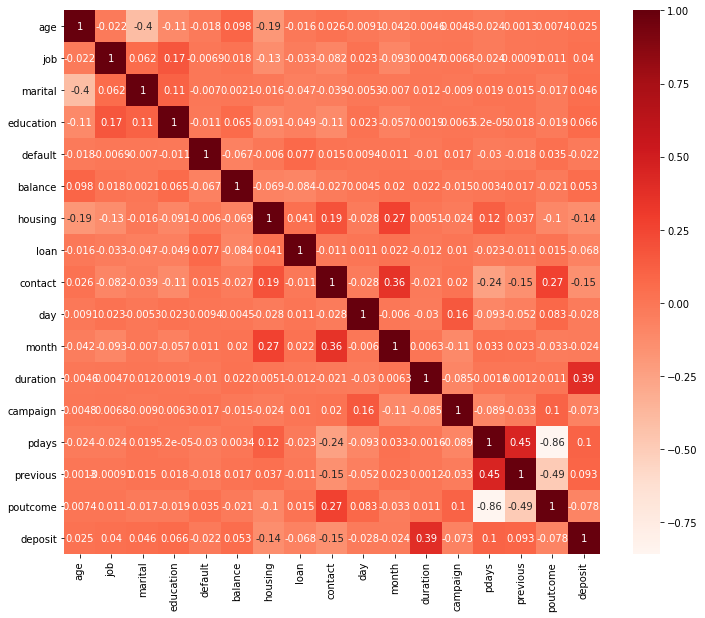

In [57]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
cor = dataset.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [58]:
for name, model in models:
    print(name)
    model.fit(X_train, Y_train)
    y_pred = model.predict(X_test)
    print(classification_report(Y_test, y_pred))
    #print(confusion_matrix(Y_test, y_pred))


LR
              precision    recall  f1-score   support

           0       0.90      0.98      0.94     11938
           1       0.59      0.22      0.32      1626

    accuracy                           0.89     13564
   macro avg       0.75      0.60      0.63     13564
weighted avg       0.86      0.89      0.86     13564

KNNeuclidean
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     11938
           1       0.58      0.34      0.43      1626

    accuracy                           0.89     13564
   macro avg       0.75      0.65      0.68     13564
weighted avg       0.87      0.89      0.88     13564

KNNmanhattan
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     11938
           1       0.61      0.32      0.42      1626

    accuracy                           0.89     13564
   macro avg       0.76      0.65      0.68     13564
weighted avg       0.88      0.89      0.88  

In [61]:
from sklearn.metrics import  accuracy_score, make_scorer

for name, model in models:
    #print(name)

    accuracies = cross_val_score(model, X, Y, cv = 10, 
               scoring='accuracy')
    f1s = cross_val_score(model, X, Y, cv = 10, 
               scoring='f1_weighted')

    #print (accuracies.mean()) 
    #print (f1s.mean()) 

In [62]:
#WITH FEATURE SELECTION INFORMATION GAIN 
def infgainevaluation(X, kol):
    print("k = ", kol)
    newdata = inf_gain(X, kol)
    for name, model in models:
        print(model)

        accuracies = cross_val_score(model, newdata, Y, cv = 10, 
               scoring='accuracy')
        f1s = cross_val_score(model, newdata, Y, cv = 10, 
               scoring='f1_weighted')

        print (accuracies.mean()) 
        print (f1s.mean()) 

In [768]:
gain = [5,8,10, 12]
for i in gain:
    infgainevaluation(X, i)

k =  5
[0.011 0.009 0.006 0.009 0.002 0.022 0.014 0.005 0.018 0.007 0.026 0.071
 0.005 0.029 0.017 0.034]
balance
month
duration
pdays
poutcome
['duration', 'poutcome', 'pdays', 'month', 'balance', 'contact', 'previous', 'housing', 'age', 'education', 'job', 'day', 'marital', 'campaign', 'loan', 'default']
LogisticRegression()
0.8848947478967141
0.8557963810549845
KNeighborsClassifier(metric='euclidean')
0.7723317769813896
0.7789168296305043
KNeighborsClassifier(metric='manhattan')
0.771535483190587
0.7784518750213617
DecisionTreeClassifier()
0.7540175187177514
0.7719009015509584
GaussianNB()
0.830481845935734
0.833091207175497
RandomForestClassifier()
0.7805157239090936
0.7871576330154056
k =  8
[0.013 0.01  0.006 0.007 0.    0.022 0.013 0.001 0.014 0.008 0.025 0.071
 0.006 0.028 0.013 0.037]
age
balance
contact
month
duration
pdays
previous
poutcome
['duration', 'poutcome', 'pdays', 'month', 'balance', 'contact', 'age', 'previous', 'housing', 'job', 'day', 'education', 'campaign', 'm

In [63]:
def rfevaluation(X, kol):
    print("k = ", kol)
    newdata = rf(X, kol)
    for name, model in models:
        print(name)

        accuracies = cross_val_score(model, newdata, Y, cv = 10, 
               scoring='accuracy')
        f1s = cross_val_score(model, newdata, Y, cv = 10, 
               scoring='f1_weighted')

        print (accuracies.mean()) 
        print (f1s.mean()) 

In [770]:
gain = [5,8,10, 12]
for i in gain:
    rfevaluation(X, i)

k =  5
[0.102 0.042 0.018 0.025 0.002 0.125 0.023 0.009 0.017 0.088 0.098 0.289
 0.037 0.056 0.012 0.057]
['duration', 'balance', 'age', 'month', 'day']
[11, 5, 0, 10, 9]
LogisticRegression()
0.8858458013177681
0.8546337141849121
KNeighborsClassifier(metric='euclidean')
0.6893637348768307
0.721861263066381
KNeighborsClassifier(metric='manhattan')
0.6910669614823195
0.7229756420747123
DecisionTreeClassifier()
0.6557875670087823
0.7043598762028631
GaussianNB()
0.8760912781974453
0.8605596692086277
RandomForestClassifier()
0.707412941777137
0.730868670667614
k =  8
[0.099 0.043 0.018 0.024 0.002 0.126 0.022 0.009 0.018 0.09  0.1   0.29
 0.036 0.055 0.01  0.058]
['duration', 'balance', 'month', 'age', 'day', 'poutcome', 'pdays', 'job']
[11, 5, 10, 0, 9, 15, 13, 1]
LogisticRegression()
0.8846956915689825
0.8562018967918992
KNeighborsClassifier(metric='euclidean')
0.7497484049324685
0.7665017963167683
KNeighborsClassifier(metric='manhattan')
0.7561186672133318
0.7697627432208146
DecisionTree